# DM2 - STATISTIQUES $BOOTSTRAP$

Import des librairies:

In [26]:
import numpy as np
import random
import pandas as pd
from sklearn import linear_model as lm
import scipy.stats as stats
from numpy import linalg as LA
from numpy.linalg import inv
from numpy.linalg import matrix_rank
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import t
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import beta
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

Définition des palettes de couleurs:

In [27]:
#palette de couleurs
sns.set_palette("colorblind")
color_blind_list = sns.color_palette("colorblind", 8)
my_orange = color_blind_list[2]
my_green = color_blind_list[1]
my_blue = color_blind_list[0]
my_pink = color_blind_list[3]
%matplotlib inline

Définition de la $random$ $seed$:

In [28]:
random.seed(1)

## Exercice 1 : Fonction $\beta$

1 : On génère 500 échantillons de la fonction $\beta$ de paramètres (2,5) et on trace un histogramme avec des $bins$ de 25.

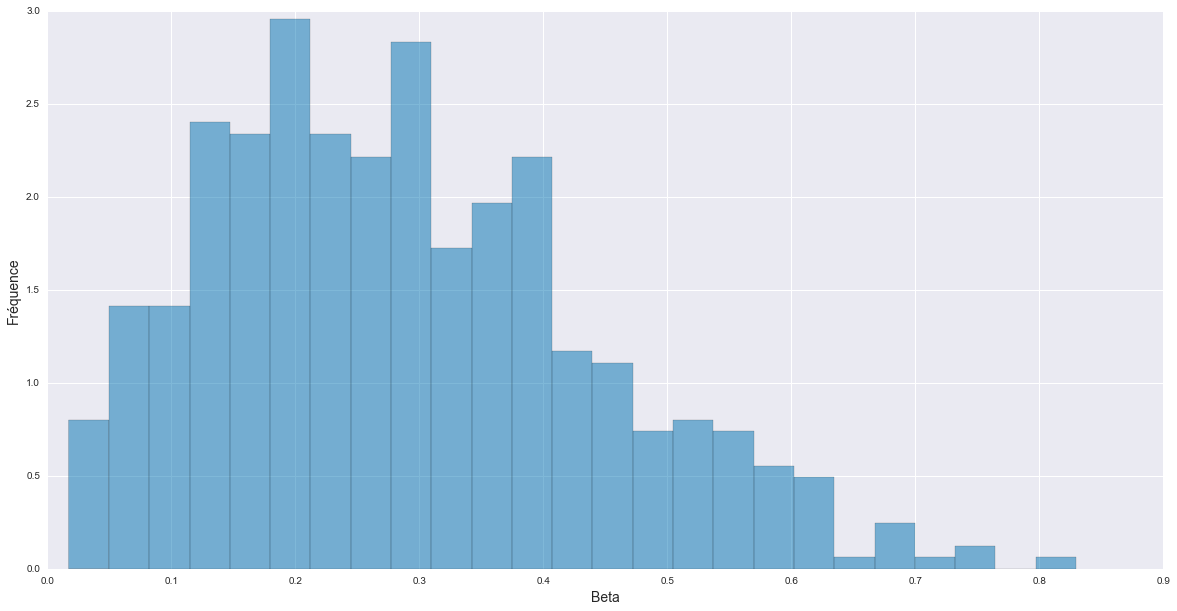

les 10 premieres lignes de l' échantillon: [ 0.11078437  0.51733695  0.39115387  0.43314302  0.31716353  0.24489285
  0.3274978   0.25295127  0.34674966  0.25103246]


In [29]:
a = 2.0
b = 5.0
sample1D = beta.rvs(a, b, size=500)
fig1 = plt.figure(figsize=(20, 10))
plt.hist(sample1D, bins=25, normed=True, align='mid', color=my_blue, alpha=0.5)
plt.ylabel('Fréquence', fontsize=14)
plt.xlabel('Beta', fontsize=14)
plt.legend()
plt.show()
#on peut afficher les dix premières lignes de l'échantillon
print('les 10 premieres lignes de l\' échantillon:', sample1D[:10])

2 : On génère cette fois 500 vecteurs indépendants dans $\mathbb{R}^2$, $(X_{1,i},X_{2,i})$ dont chaque coordonnée suit une loi $\beta(2,5)$

In [30]:
sample2D = beta.rvs(a, b, size=[500, 2])
print('les 10 premières lignes de l\' échantillon:', sample2D[:10, :])

les 10 premières lignes de l' échantillon: [[ 0.05127391  0.26821051]
 [ 0.45236216  0.44100397]
 [ 0.23557851  0.42300246]
 [ 0.46248273  0.62326224]
 [ 0.16784496  0.54245943]
 [ 0.52022517  0.0428395 ]
 [ 0.16324256  0.36177343]
 [ 0.22272432  0.62954362]
 [ 0.17313275  0.57345463]
 [ 0.12700199  0.11821929]]


On calcule le vecteur moyenne $\hat{\mu}$ de l'échantillon dans $\mathbb{R}^2$:

In [31]:
mean_of_sample2D = [np.mean(sample2D[:, 0]), np.mean(sample2D[:, 1])]
x_mean = np.mean(sample2D[:, 0])
y_mean = np.mean(sample2D[:, 1])
print('la moyenne de l\'échantillon', mean_of_sample2D)

la moyenne de l'échantillon [0.28373792010274124, 0.29064307305271792]


3: A l'aide de la méthode $bootstrap$, on va calculer B=500 estimateurs $\mu^{\star}$ de la moyenne dans $\mathbb{R}^2$. Pour ce faire, on va effectuer 500 fois un $shuffle$ de l'échantillon $(X_{1},X_{2})$ et pour chaque $shuffle_i$, on calcule la moyenne $\mu^{\star}_{i}$

In [32]:
B = 500
mean_estimator_star = []#pour stocker les résultats du calcul de la moyenne pour chaque échantillon shuffle

for i in range(B):
    X_from_beta = sample2D[np.random.randint(500, size=500)]#echantillon shuffle
    mean_X_from_beta = [np.mean(X_from_beta[:, 0]), np.mean(X_from_beta[:, 1])]#calcul de la moyenne de l'échantillon shuffle
    mean_estimator_star.append(mean_X_from_beta)#stockage du résultat dans la liste
mean_estimator_star = np.array(mean_estimator_star).reshape(500, 2)
print('l\'estimateur bootstrap de la moyenne de l\'échantillon', mean_estimator_star[:10, :])


l'estimateur bootstrap de la moyenne de l'échantillon [[ 0.29330162  0.29190687]
 [ 0.29779639  0.29676709]
 [ 0.27466575  0.28546627]
 [ 0.28884027  0.30857511]
 [ 0.28614583  0.29555737]
 [ 0.27722619  0.29697853]
 [ 0.29669624  0.29343003]
 [ 0.27942078  0.29613281]
 [ 0.28633654  0.29870345]
 [ 0.28475472  0.2859842 ]]


On trace sur le même graphe l'estimateur de la moyenne $\hat{\mu}$ et les estimateurs $bootstrap$ de la moyenne $\mu^{\star}_{b}$:

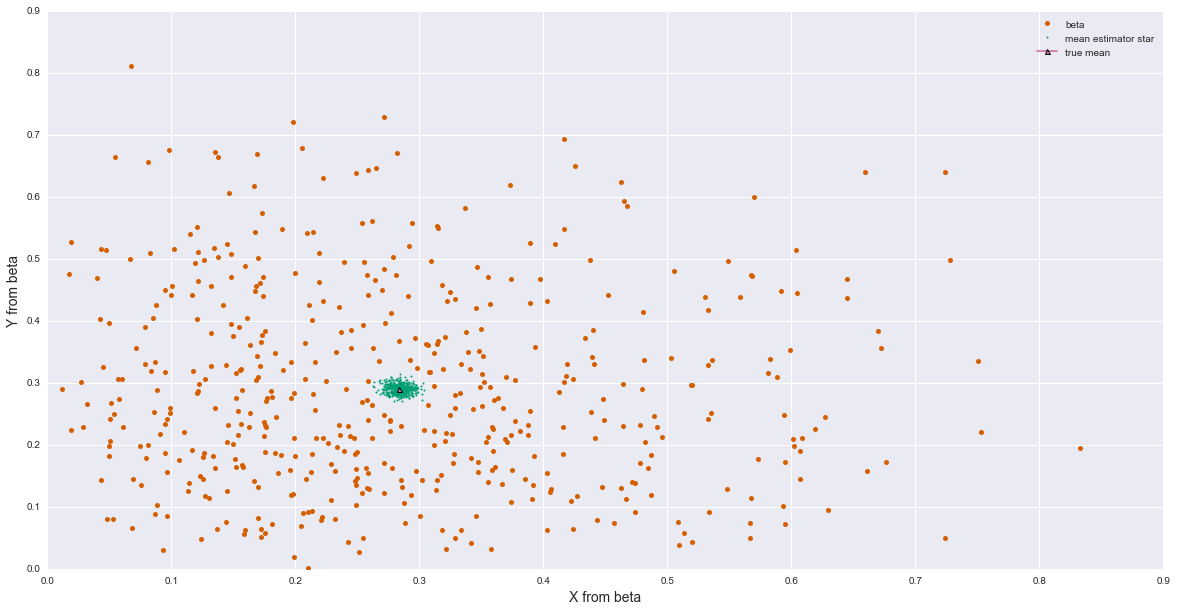

In [33]:
fig2 = plt.figure(figsize=(20, 10))
ax = fig2.gca()
plt.plot(sample2D[:, 0], sample2D[:, 1], 'o', markeredgecolor='k', markersize=5, color=my_orange, label='beta')
plt.plot(mean_estimator_star[:, 0], mean_estimator_star[:, 1], 'o', markeredgecolor='k', markersize=2, color=my_green, label='mean estimator star')
ax.plot(x_mean, y_mean, marker='^', markeredgewidth=1, markersize=5, color=my_pink, label='true mean')
plt.ylabel('Y from beta', fontsize=14)
plt.xlabel('X from beta', fontsize=14)
plt.legend()
plt.show()

4: Toujours en utilisant la méthode $bootstrap$ on calcule une estimation du biais de l'estimateur de la moyenne $\hat{\mu}$:

In [34]:
bias_star = [0, 0]
for i in range(B):
    bias_star += - (mean_of_sample2D - mean_estimator_star[i, :])#où mean_sample2D est l'estimateur de la moyenne et mean_estimator_star est le tableau des moyennes obtenues par bootstrap
bias_star *= (1/B)
print('le biais de l\'estimateur de la moyenne par bootstrap est: ', bias_star)

le biais de l'estimateur de la moyenne par bootstrap est:  [  3.49628759e-04   4.67476847e-05]


On s'intéresse maintenant à la variance de l'estimateur moyenne calculée à partir de la méthode $bootstrap$. On peut utiliser la formule du DM ou la fonction $np.cov$ de $numpy$ et récupérer la diagonale de la matrice covariance. Les résultats obtenus sont bien-entendu les mêmes.

In [35]:
covar_matrix_star = np.cov(mean_estimator_star.transpose(), bias=True)#on reprend notre tableau d'estimateurs bootstrap de la moyenne
print('la matrice de covariance est :', covar_matrix_star)
var_star = np.diag(covar_matrix_star)
print('la variance obtenue à partir de la diagonale de la matrice de covariance est:', var_star)
#check the formula given by the DM and compare with the covariance matrix
mean_bar_star = [np.mean(mean_estimator_star[:, 0]), np.mean(mean_estimator_star[:, 1])]
diff = mean_estimator_star - mean_bar_star
var_star_check = [0, 0]
for i in range(B):
    var_star_check += np.dot(diff.transpose()[:, [i]], diff[[i], :])
var_star_check *= (1/float(B))
var_star_check = np.diag(var_star_check)
print('Vérification de la relation du DN pour la variance bootstrap', var_star_check)

la matrice de covariance est : [[  4.89525351e-05  -5.45586622e-06]
 [ -5.45586622e-06   5.09722821e-05]]
la variance obtenue à partir de la diagonale de la matrice de covariance est: [  4.89525351e-05   5.09722821e-05]
Vérification de la relation du DN pour la variance bootstrap [  4.89525351e-05   5.09722821e-05]


On va utiliser maintenant la méthode $jackknnife$ pour calculer le biais et la variance de $\hat{\mu}$. Dans un premier temps on génère des échantillons $(X_{1},X_{2})$ dont on a retiré la ligne $i$. De la même façon que précédemment, on va stocker tous les résultats obtenus (à savoir l'estimateur moyenne $\hat{\mu}_{-i}$ calculé pour chaque échantillon $jackknife$) dans un talbeau.

In [36]:
n = len(sample2D)
results_mean_JK = []
#on construit un échantillon sans la ligne i et on calcul la moyenne de cet échantillon
for i in range(len(sample2D)):
    temp_sample = np.delete(sample2D, i, axis=0)
    mean_X_from_JK = [np.mean(temp_sample[:, 0]), np.mean(temp_sample[:, 1])]#moyenne de l'échantillon sans la ligne i
    results_mean_JK.append(mean_X_from_JK)#stocker toutes les moyennes des échantillons i dans une matrice pour ne pas refaire le calcul à chaque fois
results_mean_JK = np.array(results_mean_JK).reshape(500, 2)
print('la moyenne obtenue par JK', results_mean_JK[:10, :])#on affiche les dix premiers résultats du tableau moyenne jackknife


la moyenne obtenue par JK [[ 0.28420378  0.29068803]
 [ 0.2834      0.29034175]
 [ 0.28383443  0.29037782]
 [ 0.28337971  0.2899765 ]
 [ 0.28397017  0.29013843]
 [ 0.283264    0.29113967]
 [ 0.28397939  0.29050053]
 [ 0.28386019  0.28996391]
 [ 0.28395957  0.29007632]
 [ 0.28405202  0.29098861]]


On s'intéresse maintenant au biais, on le calcule en utilisant la formule donnée dans le DM $\widehat{Bias_{Jack}} = \frac{n-1}{n}\sum\limits_{i=1}^n(\hat{\mu}_{-i} - \hat{\mu}) $:

In [37]:
bias_JK = [0, 0]
for i in range(n):
      diff_JK = results_mean_JK[i, :] - mean_of_sample2D
      bias_JK += diff_JK
bias_JK *= ((n-1)/n)
print('bias_JK', bias_JK)

bias_JK [ -1.17448273e-14  -1.04706244e-14]


On remarque que le biais obtenu par $Jackknife$ est nul comparé au $Bootstrap$, cela vient du fait que l'on retire une ligne à l'échantillon sans $reshuffle$ et donc l'échantillon $Jackknife$ est plus proche de l'échantillon vrai observé.

On calcule maintenant la variance obtenue par $Jackknife$. Comme prédemment on peut utiliser la méthode $np.cov$ de $numpy$ avec les bons facteurs correctifs ou la relation donnée dans le DM.

In [38]:
#Vérification de la relation donnée dans le DM
mean_from_meanJK = [np.mean(results_mean_JK[:, 0]), np.mean(results_mean_JK[:, 1])]#1/n de la somme des mu-i hat
var_JK = [0, 0]
for i in range(n):
    results_mean_JK_centered = results_mean_JK[[i], :] - mean_from_meanJK #results_mean_JK est le tableau d'estimateurs de la moyenne obtenus par Jackknife
    product_diff = np.dot(results_mean_JK_centered.transpose(), results_mean_JK_centered)
    var_JK += product_diff
var_JK *= ((n-1)/n)
var_JK = np.diag(var_JK)
print('var_JK formule du DM', var_JK)

var_JK formule du DM [  5.21053847e-05   5.10598243e-05]


In [39]:
#calcul de var_JK en utilisant np.cov pour la matrice de covariance
covar_mean_JK = (n-1)*np.cov(results_mean_JK.transpose(), bias=True)
print('la matrice de covariance de l\'estimateur de la moyenne obtenu par JK', covar_mean_JK)
var_JK_covar = np.diag(covar_mean_JK)
print('la variance obtenue par la matrice de covariance JK:', var_JK_covar)

la matrice de covariance de l'estimateur de la moyenne obtenu par JK [[  5.21053847e-05  -3.09891524e-06]
 [ -3.09891524e-06   5.10598243e-05]]
la variance obtenue par la matrice de covariance JK: [  5.21053847e-05   5.10598243e-05]


On compare la variance sur l'estimateur de la moyenne obtenue par $Jackknife$ avec la variance non biaisée de l'échantillon. On peut vérifier que $\widehat{Var}_{Jack} = \frac{1}{n}\widehat{Var}_{n}(X)$ où $\widehat{Var}_{n}(X)$ est la variance non biaisée.

In [40]:
covar_empirique = (1/n)*np.cov(sample2D.transpose(), ddof=1)
print('la covariance du la loi beta:', covar_empirique)
var_empiric_from_covar_n = np.diag(covar_empirique)
print('la variance from covar de mon échantillon de la loi beta divisée par n:', var_empiric_from_covar_n)
np.isclose(var_JK_covar, var_empiric_from_covar_n)

la covariance du la loi beta: [[  5.21053847e-05  -3.09891524e-06]
 [ -3.09891524e-06   5.10598243e-05]]
la variance from covar de mon échantillon de la loi beta divisée par n: [  5.21053847e-05   5.10598243e-05]


array([ True,  True], dtype=bool)

5: On calcule la variance vraie de l'estimateur de la moyenne pour la loi $\beta(a,b)$ avec $a=2$ et $b=5$:

La moyenne est donnée par $\mu = \frac{1}{1+\frac{b}{a}}\sim 2.8571$ et la variance par $Var = \frac{a b}{(a+b+1)(a+b)^2}\sim 0.0255$

In [41]:
true_asymptotic_mean = a*b/(1+(b/a))
print('la moyenne asympotique de la loi beta:', true_asymptotic_mean)
true_asymptotic_var = a*b/((a+b+1)*(a+b)**2)
print('la variance asymptotique de la loi beta:', true_asymptotic_var)
matrix_covar_true = np.array([[true_asymptotic_var, 0.0],[0.0, true_asymptotic_var]])

la moyenne asympotique de la loi beta: 2.857142857142857
la variance asymptotique de la loi beta: 0.025510204081632654


Afin de comparer les différentes approches $Jackknife$ et $Bootstrap$, on calcule la distance entre leur matrice de covariance et la matrice de covariance asymptotique $\|\left( \begin{array}{cc}\hat{v_{11}} & \hat{v_{12}} \\\hat{v_{21}} & \hat{v_{21}}\end{array} \right)-\left( \begin{array}{cc} v_{11} & v_{12} \\v_{21} & v_{21}\end{array} \right)\|$

In [42]:
distance_bootstrap = abs(var_star[0] - (1/n)*true_asymptotic_var) + abs(var_star[1] - (1/n)*true_asymptotic_var)+abs(covar_matrix_star[0, 1] - matrix_covar_true[0, 1])
distance_JK = abs(var_JK[0] - (1/n)*true_asymptotic_var) + abs(var_JK[1] - (1/n)*true_asymptotic_var)+abs(covar_mean_JK[0, 1] - matrix_covar_true[0, 1])
print('distance Bootstrap', distance_bootstrap)
print('distance JK', distance_JK)

distance Bootstrap 7.57186534907e-06
distance JK 4.22330793145e-06


Pour mieux visualiser ces résultats, on peut les stocker dans une dataframe:

In [43]:
#on construit un dataframe qui résume tout
d = {'bootstrap':pd.Series([bias_star, var_star, var_star_check, var_empiric_from_covar_n, distance_bootstrap], index=['bias', 'var from covar', 'var from DM', 'var empiric from covar', 'distance to asymptotic']),
     'Jackknife':pd.Series([bias_JK,var_JK_covar,var_JK, var_empiric_from_covar_n, distance_JK], index=['bias','var from covar', 'var from DM',
                                                                                                          'var empiric from covar', 'distance to asymptotic'])}

df = pd.DataFrame(d)
print(display(df))

,Jackknife,bootstrap
bias,"[-1.17448273329e-14, -1.04706243675e-14]","[0.000349628759249, 4.67476847419e-05]"
var from covar,"[5.21053847141e-05, 5.10598243e-05]","[4.89525351422e-05, 5.09722820552e-05]"
var from DM,"[5.21053847141e-05, 5.10598243e-05]","[4.89525351422e-05, 5.09722820552e-05]"
var empiric from covar,"[5.21053847141e-05, 5.10598243e-05]","[5.21053847141e-05, 5.10598243e-05]"
distance to asymptotic,4.22331e-06,7.57187e-06


None


## Exercice 2: Loi uniforme et coefficient de correlation

6: On génère 300 vecteurs $X_{i}$ indépendants avec 2 composantes $X_{i1}$ et $X_{i2}$ vérifiant $X_{i2} = X_{i1} + U_{i}$ où $X_{i1}$ suit une loi uniforme $\mathcal{U}[0,1]$ et $U_{i}$ suit une loi uniforme $\mathcal{U}[-0.1,0.1]$. Pour cela, on va créer une fonction qui nous servira pour la suite du devoir.

In [44]:
def create_UniformSample(N, param):
    U = np.random.uniform(low=param[0], high=param[1], size=N)
    X1 = np.random.uniform(low=param[2], high=param[3], size=N)
    X2 = X1 + U
    data = np.vstack((X1, X2)).T
    return data
X1_X2 = create_UniformSample(300, [-0.1, 0.1, 0, 1.0])
#donc on a 300 lignes et 2 colonnes
print('les 10 premières valeurs de X1_X2:', X1_X2[0:10])

les 10 premières valeurs de X1_X2: [[ 0.83604455  0.93049941]
 [ 0.03480402  0.10707639]
 [ 0.39375875  0.32098925]
 [ 0.78280328  0.78062024]
 [ 0.77538626  0.85783448]
 [ 0.9603931   0.94842191]
 [ 0.37811439  0.32918652]
 [ 0.04752454  0.01837538]
 [ 0.61701801  0.59497181]
 [ 0.4027172   0.45727049]]


On peut éventuellement vérifier sur un graphe les résultats:

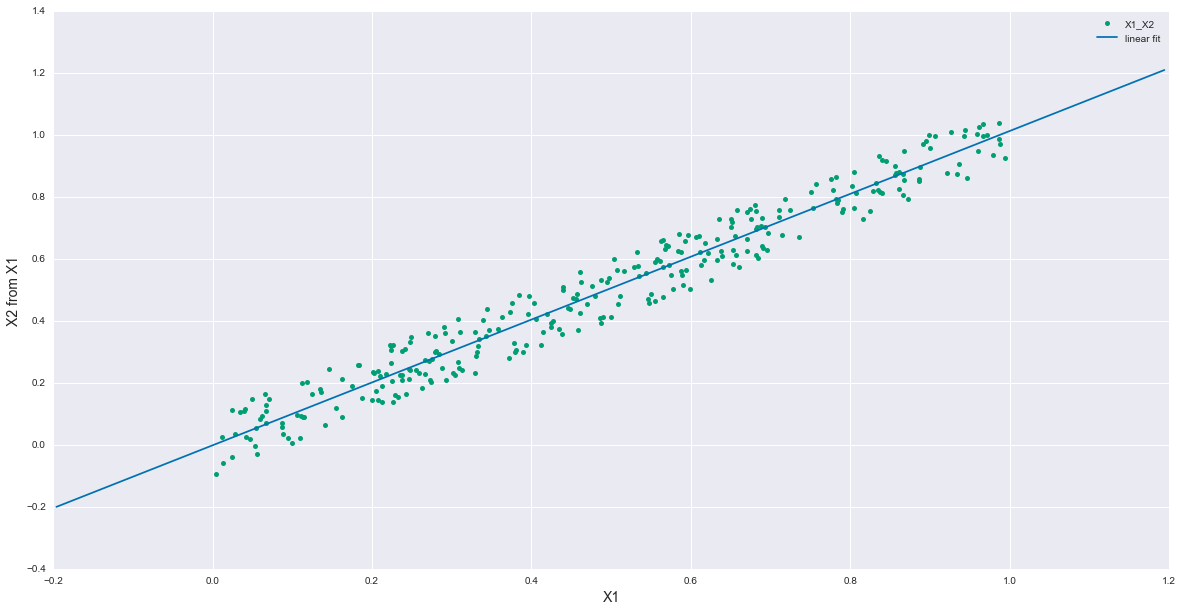

In [45]:
skl_lm = lm.LinearRegression()
X1 = X1_X2[:, 0]
skl_lm.fit(X1.reshape(X1.shape[0], 1), X1_X2[:, 1])
x_grid = np.linspace(X1.min() - 0.2, X1.max() + 0.2)
#on plot la distribution
fig4 = plt.figure(figsize=(20, 10))
plt.plot(X1_X2[:, 0], X1_X2[:, 1], 'o', markeredgecolor='k', markersize=5, color=my_green, label='X1_X2')
plt.plot(x_grid, skl_lm.predict(x_grid.reshape(x_grid.shape[0], 1)), '-', label='linear fit')
plt.ylabel('X2 from X1', fontsize=14)
plt.xlabel('X1', fontsize=14)
plt.legend()
plt.show()

7: On calcule le coefficient de corrélation vraie $c_{0}$:

$\begin{align}
Cor(X_{2},X_{1}) &= \frac{\mathbb{E}[(X_{2} - \mathbb{E}(X_{2}))(X_{1} - \mathbb{E}(X_{1}))]}{\sigma_{X_{2}}\sigma_{X_{1}}}\\
Cor(X_{2},X_{1}) &= \frac{\mathbb{E}[(X_{1}+U - \mathbb{E}(X_{1})-\mathbb{E}(U))(X_{1} - \mathbb{E}(X_{1}))]}{\sigma_{X_{2}}\sigma_{X_{1}}}\\
&=\frac{\mathbb{E}[X_{1}^2-2X_{1}\mathbb{E}(X_{1})+UX_{1}-U\mathbb{E}(X_{1})+\mathbb{E}^2(X_{1})-X_{1}\mathbb{E}(U)+\mathbb{E}(U)\mathbb{E}(X_{1})]}{\sigma_{X_{2}}\sigma_{X_{1}}}\\
&= \frac{\sigma_{X_{1}}}{\sigma_{X_{2}}}\\
\end{align}$  
On calcule la variance de $X_{2}$ pour déterminer $\sigma_{X_{2}}$:  
$\begin{align}
Var(X_{2}) &= \mathbb{E}[(X_{1}+U - \mathbb{E}(X_{1})-\mathbb{E}(X_{U}))(X_{1} - \mathbb{E}(X_{1}))]\\
&=\mathbb{E}[X_{1}^2+U^2+\mathbb{E}^2(X_{1})+\mathbb{E}^2(U)+2\mathbb{E}(X_{1})\mathbb{E}(U)-2X_{1}\mathbb{E}(X_{1})-2X_{1}\mathbb{E}(U)-2U\mathbb{E}(X_{1})-2U\mathbb{E}(U)+2\mathbb{E}(X_{1})\mathbb{E}(U)]\\
\end{align}$  
Sachant que $\mathbb{E}[X\mathbb{E}(X)]=\mathbb{E}^2(X)$, en simplifiant, on obtient:  
$\begin{align}
Var(X_{2})&=\mathbb{E}(X_{1}^2)-\mathbb{E}^2(X_{1})+\mathbb{E}(U^2)-\mathbb{E}^2(U)\\
&= \sigma_{X_{1}}^2+\sigma_{U}^2\\
\end{align}$  
Pour une loi uniforme sur $[a,b]$, l'espérance est donnée par $\frac{a+b}{2}$ et la variance par $\frac{(b-a)^2}{12}$.
D'où finalement le coefficient de corrélation:  
$\begin{align}
Cor(X_{2},X_{1}) &= \frac{1/12}{\sqrt{(1^2+(0.1+0.1)^2)/12}\sqrt{1/12}}\\
&=\sqrt{\frac{1}{1.04}}\\
&\sim 0.98058\\
\end{align}$

In [47]:
var_X1 = 1.0/12
var_X2 = (1 + (0.2)**2)/12
corr_true_X1X2 = var_X1/(np.sqrt(var_X1)*np.sqrt(var_X2))
print('le coefficient de corrélation vraie entre X1 et X2 est:', corr_true_X1X2)

le coefficient de corrélation vraie entre X1 et X2 est: 0.980580675691


On calcule le coefficient de corrélation estimé avec $np.corr$:

In [48]:
corr_hat_X1X2 = np.corrcoef(X1_X2.transpose())[0, 1]
print('le coefficient de corrélation estimé entre X1 et X2 est:', corr_hat_X1X2)

le coefficient de corrélation estimé entre X1 et X2 est: 0.978268032268


8: On calcule l'intervalle de confiance à 5% pour le coefficient de corrélation en utilisant le $basic$ $bootstrap$. On prend B=500 pour les réplicas.  
On va également définir une fonction qui permettra de calculer cet intervalle de confiance et qui pourra nous servir dans la suite du devoir.  
L'intervalle de confiance pour le $basic$ $bootstrap$ est défini par :  
$[\hat{\theta}-\frac{1}{\sqrt{n}}\hat{\xi}^{bb}_{1-\alpha/2},\hat{\theta}-\frac{1}{\sqrt{n}}\hat{\xi}^{bb}_{\alpha/2}]$  
où $\hat{\xi}^{bb}_{\alpha}$ est le $\alpha$-quantile de $\sqrt{n}(\hat{\theta}^{\star}-\hat{\theta})$

In [50]:
def IC_BasicBootstrap(B, data):#definitation de la fonction
    N = len(data)
    cor_hat_data = np.corrcoef(data.transpose())[0, 1]#calcul de l'estimateur du coefficient de corrélation sur les données
    corr_boostrap = []
    for i in range(B):#shuffling des données
        temp_data = data[np.random.randint(N, size=N)]
        corr_from_tempData = np.corrcoef(temp_data.transpose())
        corr_boostrap.append(corr_from_tempData[0, 1])
    corr_star_centered = np.sqrt(N) * (corr_boostrap - cor_hat_data)
    ksi_star_alphasur2 = np.percentile(corr_star_centered, 2.5)#calcul des percentiles de sqrt(theta_star-theta)
    ksi_star_1moins_alphasur2 = np.percentile(corr_star_centered, 97.5)
    borne_sup_ICstar = cor_hat_data - (1 / np.sqrt(N)) * ksi_star_alphasur2
    borne_inf_ICstar = cor_hat_data - (1 / np.sqrt(N)) * ksi_star_1moins_alphasur2
    IC_BB = [borne_inf_ICstar, borne_sup_ICstar]
    return IC_BB

print('intervalle de confiance basic bootstrap: ', IC_BasicBootstrap(500, X1_X2))

intervalle de confiance basic bootstrap:  [0.97479300463333818, 0.98197837254515286]


9: On calcule l'intervalle de confiance à 5% pour le coefficient de corrélation en utilisant le $percentile$ $bootstrap$. On prend B=500 pour les réplicas.  
On va également définir une fonction qui permettra de calculer cet intervalle de confiance et qui pourra nous servir dans la suite du devoir.  
L'intervalle de confiance pour le $percentile$ $bootstrap$ est défini par :  
$[\hat{q}_{\alpha/2},\hat{q}_{1-\alpha/2}]$  
où $\hat{q}_{\alpha}$ est le $\alpha$-quantile de $\hat{\theta}^{\star}$

In [51]:
def IC_TBootstrap(B, data):
    N = len(data)
    corr_boostrap = []
    for i in range(B):
        temp_data = data[np.random.randint(N, size=N)]
        corr_from_tempData = np.corrcoef(temp_data.transpose())
        corr_boostrap.append(corr_from_tempData[0, 1])
    q_alphasur2 = np.percentile(corr_boostrap, 2.5)
    q_1moins_alphasur2 = np.percentile(corr_boostrap, 97.5)
    IC_TB = [q_alphasur2, q_1moins_alphasur2]
    return IC_TB

print('intervalle de confiance percentile bootstrap:', IC_TBootstrap(500, X1_X2))

intervalle de confiance percentile bootstrap: [0.97484706674352095, 0.98110666099361898]


10: On calcule l'intervalle de confiance asymptotique à 5% pour le coefficient de corrélation, en utilisant la relation donnée dans le DM. Comme précédemment, on construit une fonction.

In [55]:
#estimation de la variance par Jackknife
def IC_asymptotic(data):
    corr_JK = []
    N = len(data)
    cor_hat_data = np.corrcoef(data.transpose())[0, 1]
    for i in range(N):
        temp_data = np.delete(data, i, axis=0)
        corr_from_tempJK = np.corrcoef(temp_data.transpose())[0, 1]
        corr_JK.append(corr_from_tempJK)
    corr_JK = np.array(np.sqrt(N) * (corr_JK - corr_true_X1X2))
    var_JK = [0, 0]
    for i in range(N):#on utilise la relation donnée dans le DM pour l'exercice 1 pour le Jackknife
        corrJK_centered = corr_JK[i] - np.mean(corr_JK)
        product_diff = np.dot(corrJK_centered.transpose(), corrJK_centered)
        var_JK += product_diff
    var_JK *= ((n - 1) / n)
    var_JK = var_JK[0]
    # Calcul de IC, sachant que sqrt(n)*(c_hat-c_0) suit une loi normale de sigma sqrt(var_JK)
    borne_inf_JK = cor_hat_data - np.sqrt(var_JK / N) * 1.96
    borne_sup_JK = cor_hat_data + np.sqrt(var_JK / N) * 1.96
    IC_asymptotic = [borne_inf_JK, borne_sup_JK]
    return IC_asymptotic

print('intervalle de confiance asymptotic:', IC_asymptotic(X1_X2))

intervalle de confiance asymptotic: [0.97484839365555109, 0.9816876708801866]


11: On va comparer les performances des différentes approches en simulant $M=2000$ fois l'expérience, c'est-à-dire qu'on va générer 2000 fois le vecteur $(X_{1},X_{2})$ et calculer l'intervalle de confiance à chaque fois pour le coefficient de corrélation. On va calculer la probabilité que le coefficient de corrélation vrai se trouve dans ces intervalles de confiance. On construit également une fonction pour effectuer cette simulation.

In [56]:
def get_coverage_proba(M):
    Count_BBootstrap = []
    Count_PBootstrap = []
    Count_Asympt = []
    count_BB = 0
    count_PB = 0
    count_Asympt = 0
    for i in range(M):
        dataU = create_UniformSample(300, [-0.1, 0.1, 0, 1.0])
        IC_BB = IC_BasicBootstrap(500, dataU)
        IC_PB = IC_TBootstrap(500, dataU)
        IC_As = IC_asymptotic(dataU)
        if corr_true_X1X2 >= IC_BB[0] and corr_true_X1X2 <= IC_BB[1]:
            count_BB += 1
            Count_BBootstrap.append(count_BB)
        if corr_true_X1X2 >= IC_PB[0] and corr_true_X1X2 <= IC_PB[1]:
            count_PB += 1
            Count_PBootstrap.append(count_PB)
        if corr_true_X1X2 >= IC_As[0] and corr_true_X1X2 <= IC_As[1]:
            count_Asympt += 1
            Count_Asympt.append(count_Asympt)
    if len(Count_BBootstrap) >= 1:
        Coverage_BB = (1 / M) * max(Count_BBootstrap)
    if len(Count_PBootstrap) >= 1:
        Coverage_PB = (1 / M) * max(Count_PBootstrap)
    if len(Count_Asympt) >= 1:
        Coverage_As = (1 / M) * max(Count_Asympt)
    results_coverage = [Coverage_BB, Coverage_PB, Coverage_As]
    return results_coverage

results_coverage = get_coverage_proba(2000)
print('le coverage proba pour BB, PB et Asymptic avec un random de 2000 est: ', results_coverage)

le coverage proba pour BB, PB et Asymptic avec un random de 2000 est:  [0.9470000000000001, 0.9510000000000001, 0.9560000000000001]


12: On va tracer dans un graphe cette probabilité de couverture que le coefficient de corrélation vraie appartienne aux intervalles de confiance pour des simulations d'experience avec $M=30$, $M=50$, $M=100$, $M=300$.

results_coverage_30: [0.8666666666666667, 0.8666666666666667, 0.8666666666666667]
results_coverage_50: [0.96, 0.9400000000000001, 0.96]
results_coverage_100: [0.9400000000000001, 0.96, 0.9500000000000001]
results_coverage_300: [0.9266666666666667, 0.9433333333333334, 0.93]


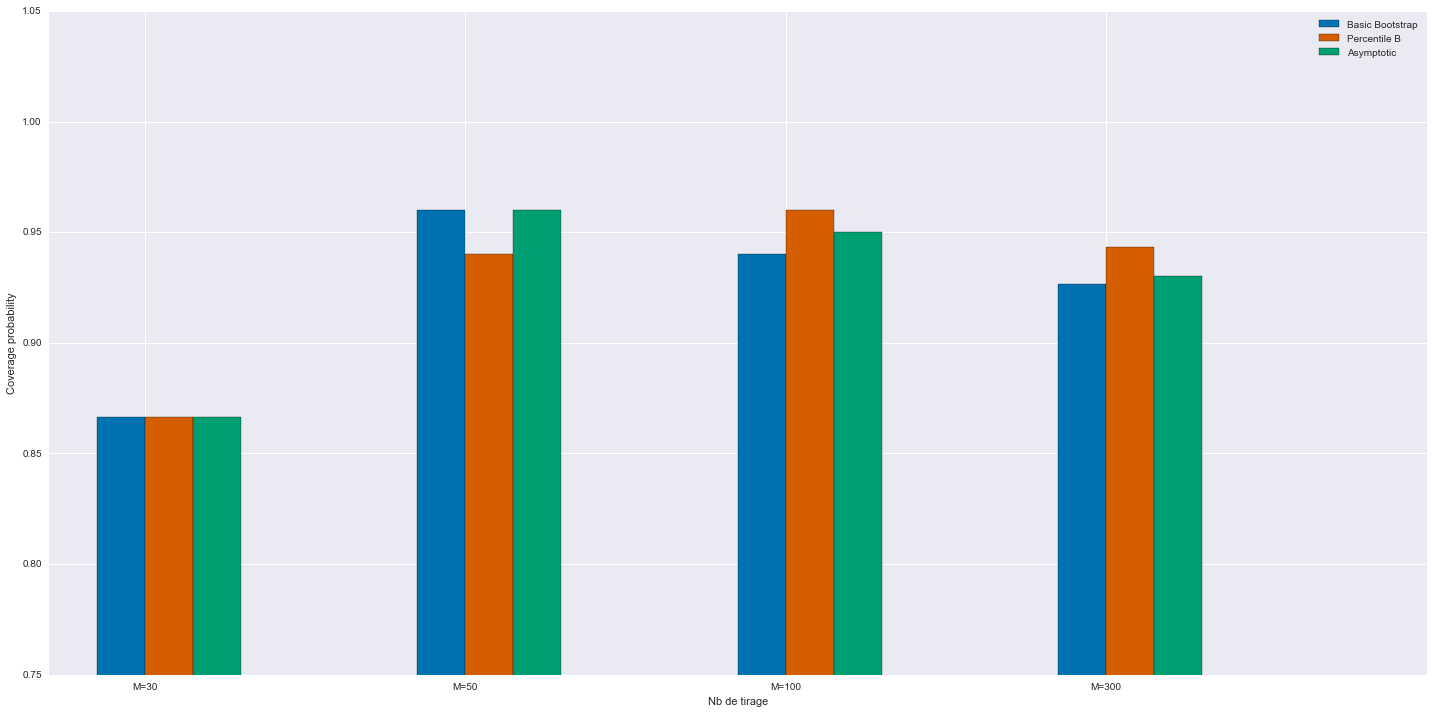

In [58]:
results_coverage_30 = get_coverage_proba(30)
print('results_coverage_30:', results_coverage_30)
results_coverage_50 = get_coverage_proba(50)
print('results_coverage_50:', results_coverage_50)
results_coverage_100 = get_coverage_proba(100)
print('results_coverage_100:', results_coverage_100)
results_coverage_300 = get_coverage_proba(300)
print('results_coverage_300:', results_coverage_300)
resume_BB = [results_coverage_30[0], results_coverage_50[0], results_coverage_100[0], results_coverage_300[0]]
resume_PB = [results_coverage_30[1], results_coverage_50[1], results_coverage_100[1], results_coverage_300[1]]
resume_As = [results_coverage_30[2], results_coverage_50[2], results_coverage_100[2], results_coverage_300[2]]

fig5 = plt.figure(figsize=(20, 10))
ax = fig5.add_subplot(111)
ind = np.arange(4)                # the x locations for the groups
width = 0.15
rectsBB = ax.bar(ind, resume_BB, width, color=my_blue)
rectsPB = ax.bar(ind+width, resume_PB, width, color=my_orange)
rectsAs = ax.bar(ind+2*width, resume_As, width, color=my_green)
ax.set_xlim(-width, len(ind)+width)
ax.set_ylim(0.75, 1.05)
xTickMarks = ['M=30', 'M=50', 'M=100', 'M=300']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
ax.legend((rectsBB[0], rectsPB[0], rectsAs[0]), ('Basic Bootstrap', 'Percentile B', 'Asymptotic'))
plt.xlabel('Nb de tirage'), plt.ylabel('Coverage probability')
plt.tight_layout()
plt.show()


## Exercice 3: Régression linéaire

On va retravailler sur les données du DM1 auto-mpg.

In [59]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/' +\
      'auto-mpg.data-original'

u_cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
          'weight', 'acceleration', 'model year', 'origin', 'car name']

data = pd.read_csv(url, sep=r"\s+", names=u_cols, na_values='NA')
data = data.dropna(axis=0, how='any')

13: On va s'intéresser uniquement aux variables explicatives quantitatives.  
On effectue ensuite une regression linéaire avec $y_{i} = \theta_{0}+X^{T}_{i}\theta+\epsilon_{i}$.  
On suppose que les $\epsilon_{i}$ ont une moyenne nulle et sont indépendants des $X_{i}$

In [60]:
y = data['mpg']
data = data.drop(['origin', 'car name', 'mpg'], axis=1)
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]
skl_linmod = lm.LinearRegression()
skl_linmod.fit(X, y)
theta0_hat = skl_linmod.intercept_
theta1_hat = skl_linmod.coef_
print('l\'intercept est :', theta0_hat)
print('le coefficient de régression linéaire: ',theta1_hat)

l'intercept est : -14.5352504805
le coefficient de régression linéaire:  [ -3.29859089e-01   7.67843024e-03  -3.91355574e-04  -6.79461791e-03
   8.52732469e-02   7.53367180e-01]


L'intercept est de : -14.5352504805  
Le coeffcient de régression linéaire $\theta$ est un vecteur de 6 composantes avec:  
* -3.29859089e-01 pour 'cylinders'
* 7.67843024e-03 pour 'displacement'
* -3.91355574e-04 pour 'horsepower'
* -6.79461791e-03 pour 'weight'
* 8.52732469e-02 pour 'acceleration'
* 7.53367180e-01 pour 'model year'

On calcule maintenant les résidus et on va tracer leur densité sur un graphe.

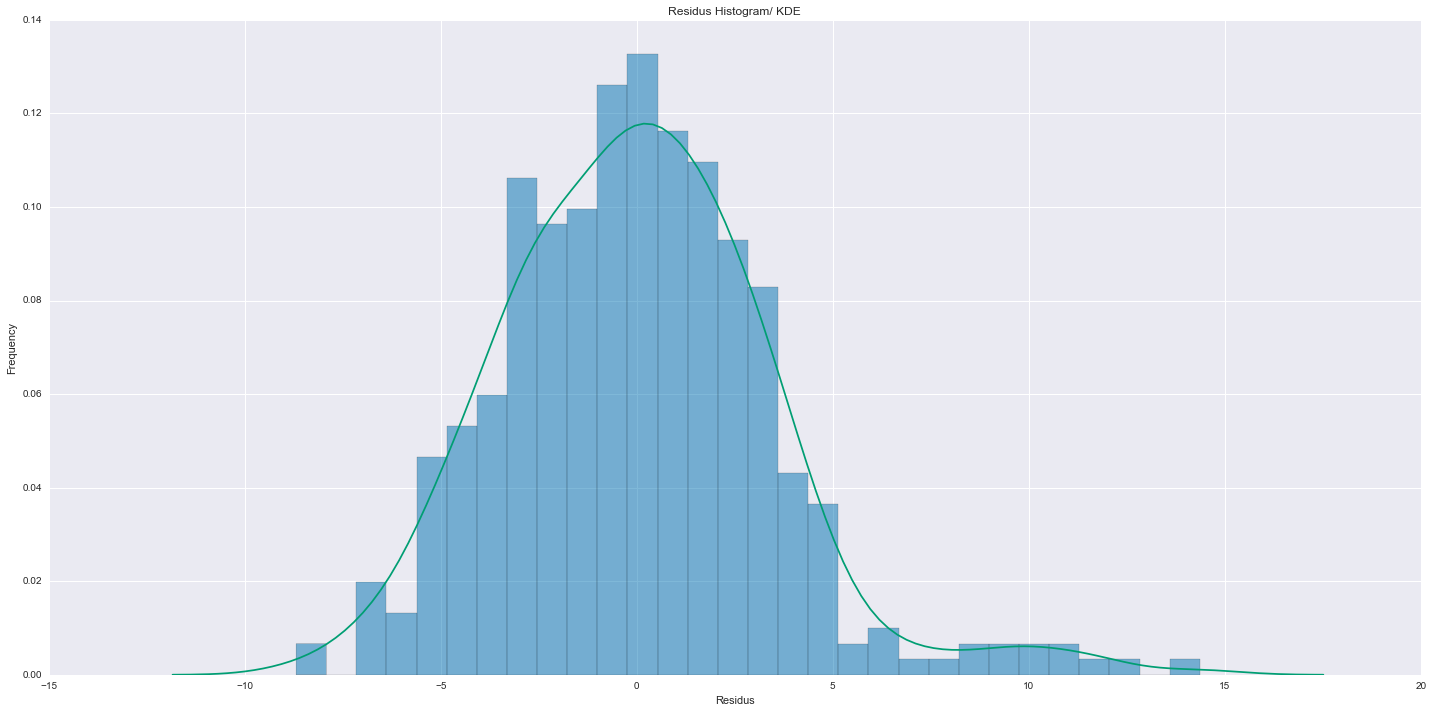

In [61]:
residus = y - skl_linmod.predict(X)
# density / histogram
fig6 = plt.figure(figsize=(20, 10))
plt.hist(residus, bins=30, normed=True, align='mid', alpha=0.5)
sns.kdeplot(residus)
plt.title('Residus Histogram/ KDE')
ax = plt.gca()
ax.legend_ = None
plt.xlabel('Residus'), plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

14: On calcule maintenant un intervalle de confiance à 5% pour le coeﬃcient $\theta_{1}$, associé à la variable 'cylinders', en supposant que chaque $\epsilon_{i}$ est Gaussien. On utilise pour cela la relation donnée dans le cours pour l'intervalle de confiance:  
$[\hat{\theta}_{j}-t_{1-\alpha/2}\hat{\sigma}\sqrt{(X^{T}X)^{-1}_{j,j}},\hat{\theta}_{j}+t_{1-\alpha/2}\hat{\sigma}\sqrt{(X^{T}X)^{-1}_{j,j}}$  
où $t_{1-\alpha/2}$ est le quantile d'ordre $1-\alpha/2$ de la loi de Student $\mathcal{T}_{n-rg(X)}$ avec $rg(X)$ rang de la matrice $X$ et $\hat{\sigma}^2 = \frac{\|y-X\hat{\theta}\|^2_2}{n - rg(X)}$  
  
On va donc dans un premier temps calculer le rang de X, le quantile de la loi de Student puis la matrice de Gram $X^{T}X$

In [67]:
alpha = 0.05
n = len(y)
rang_X = matrix_rank(X)
t_rank = n - rang_X
t_Ic = stats.t(t_rank).ppf(1-alpha/2)
Gram_matrix = np.dot(X.transpose(),X)#calcul de la matrice de Gram
Gram_inv = inv(Gram_matrix)
var_res = ((LA.norm(residus, 2))**2)/t_rank
borne_inf_theta_cyl = theta1_hat[0] - t_Ic*np.sqrt(var_res * Gram_inv[0,0])
borne_sup_theta_cyl = theta1_hat[0] + t_Ic*np.sqrt(var_res * Gram_inv[0,0])
print('l\'intervalle de confiance pour theta cyl est: ['+ str(borne_inf_theta_cyl)+', '+str(borne_sup_theta_cyl)+']' )

l'intervalle de confiance pour theta cyl est: [-0.970065499051, 0.310347320904]


L'intervalle de confiance obtenu pour $\theta$ associé à la variable 'cylinders' est [-0.970065499051, 0.310347320904]

15: On va utiliser la méthode $bootstrap$ des résidus sur les $\epsilon_{i}$ pour déterminer les $y_{i}^{\star}$ suivant la relation:  
$y_{i}^{\star} = \theta_{0}+X^{T}_{i}\theta+\epsilon_{i}^{\star}$  
On ré-applique la régression linéaire sur le nouveau couple $(X_{i},y_{i}^{\star})$ pour déterminer le nouveau $(\theta_{0},\theta)$ et on réitère le nombre de fois nécessaire.
Dans un premier temps on va écrire une méthode $bootstrap$ permettant de travailler sur des dataframes.


In [68]:
def bootstrap_on_dataframe(dat, n=None):# pour résoudre le problème des indices de pandas pour le dataframe quand on fait le bootstrap
    if isinstance(dat, pd.Series):
       dat = dat.copy()
       dat.index = range(len(dat.index))
    if n == None:
        n = len(dat)

    resample_i = np.floor(np.random.rand(n) * len(dat)).astype(int)
    dat_resample = np.array(dat[resample_i])  # TODO: write a test demonstrating why array() is important
    return dat_resample

On applique ensuite cette fonction sur les résidus et on recalcule $y_i$:

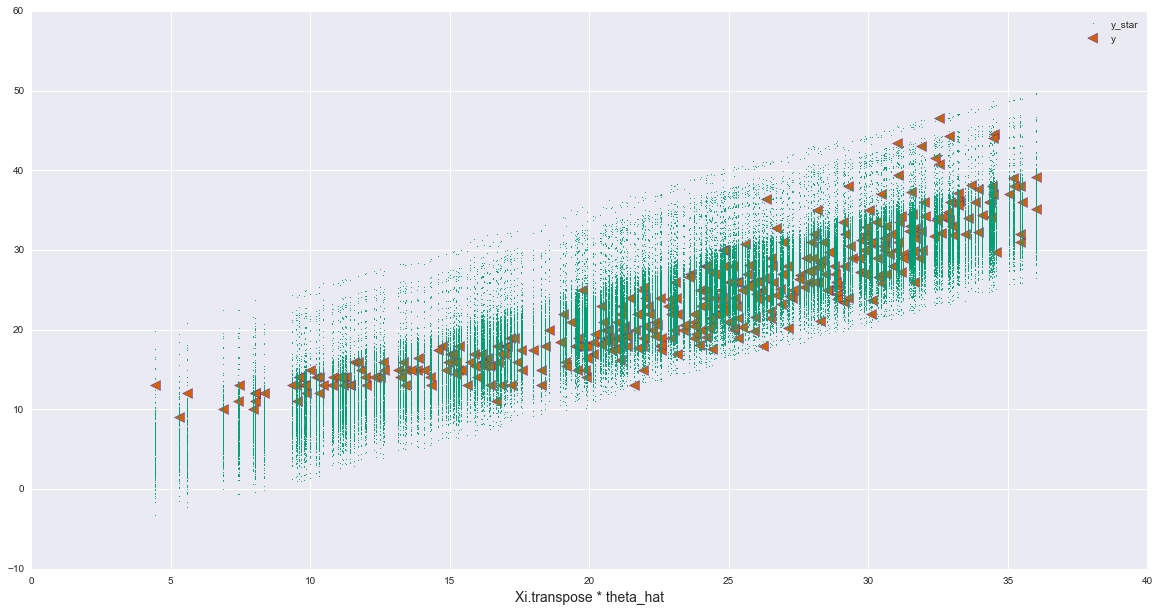

In [72]:
B = 500
theta1_hat = np.array(theta1_hat)
y_np = np.array(y)
X = np.array(data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']])
all_theta_star = []
all_intercept = []
y_star = []
y_res_star = []
residus_star = []
y_predict = skl_linmod.predict(X)
fig7 = plt.figure(figsize=(20, 10))
ax = fig7.add_subplot(111)
for i in range(B):  
    res_boot = bootstrap_on_dataframe(residus, n=None)#bootstrap sur les residus
    residus_star.append(res_boot)
    y_res = theta0_hat + np.dot(theta1_hat.transpose(), X.T) + res_boot#calcul de y_i star
    y_res_star.append(y_res)
    skl_linmod.fit(X, y_res)#regression linéaire sur y_i star
    theta_0_star = skl_linmod.intercept_#intercept bootstrap
    all_intercept.append(theta_0_star)
    theta_1_star = skl_linmod.coef_
    all_theta_star.append(theta_1_star)#theta boostrap
    ax.plot(y_predict, y_res, 'o', markeredgecolor='k', markersize=1, color=my_green, label='y_star' if i == 0 else "")
residus_star = np.array(residus_star)
y_res_star = np.array(y_res_star)
plt.scatter(y_predict, y_np, marker='<', s=100, color=my_orange, edgecolors = 'b', label='y')
all_intercept = np.array(all_intercept)
all_theta_star = np.array(all_theta_star).reshape(B, len(theta1_hat))

#j'ai appliqué la méthode des résidus dans sa totalité, à savoir qu'une fois qu'on a calculé y_res(soit y_i star dans l'énoncé, on ré-applique une régression linéaire pour calculer theta_star)
plt.xlabel('Xi.transpose * theta_hat', fontsize=14)
plt.legend()
plt.show()


16: Dans le code précédent, j'ai calculé les estimateurs $\hat{\theta}^{\star}$ par $basic$ $bootstrap$. Je reprends ces résultats qui étaient stockés dans la $np.array$ 'all_theta_star' pour définir l'intervalle de confiance à 5% de $\hat{\theta}$

In [73]:
theta1_star = all_theta_star[:, 0]
theta_star_centered = np.sqrt(n) * (theta1_star - theta1_hat[0])
ksi_star_alphasur2 = np.percentile(theta_star_centered, 2.5)
ksi_star_1moins_alphasur2 = np.percentile(theta_star_centered, 97.5)
borne_sup_ICstar = theta1_hat[0] - (1 / np.sqrt(n)) * ksi_star_alphasur2
borne_inf_ICstar = theta1_hat[0] - (1 / np.sqrt(n)) * ksi_star_1moins_alphasur2
IC_BB_theta = [borne_inf_ICstar, borne_sup_ICstar]
print(IC_BB_theta)

[-0.95627373353617684, 0.32473985187841442]


17: On va calculer l'intervalle de confiance pour chaque variable explicative avec 2 methodes: la méthode asymptotique déjà utilisée à la question 14 et la méthode bootstrap

In [75]:
#Pour la méthode asymptotique:
#'displacement','horsepower','weight','acceleration', 'model year'
borne_inf_as = []
borne_sup_as = []
for i in range(len(theta1_hat)):
    borne_inf_theta = theta1_hat[i] - t_Ic*np.sqrt(var_res * Gram_inv[i,i])
    borne_inf_as.append(borne_inf_theta)
    borne_sup_theta = theta1_hat[i] + t_Ic*np.sqrt(var_res * Gram_inv[i,i])
    borne_sup_as.append(borne_sup_theta)
    print('l\'intervalle de confiance pour la variable explicative '+str(i)+'['+str(borne_inf_theta)+','+str(borne_sup_theta)+']' )
IC_as = np.vstack((borne_inf_as, borne_sup_as)).T

l'intervalle de confiance pour la variable explicative 0[-0.970065499051,0.310347320904]
l'intervalle de confiance pour la variable explicative 1[-0.00667610930379,0.0220329697916]
l'intervalle de confiance pour la variable explicative 2[-0.0241488698788,0.0233661587313]
l'intervalle de confiance pour la variable explicative 3[-0.00808482416098,-0.00550441166577]
l'intervalle de confiance pour la variable explicative 4[-0.0945464528397,0.265092946734]
l'intervalle de confiance pour la variable explicative 5[0.706538967623,0.800195391877]


L'intervalle de confiance asymptotique pour :  
* 'cylinders' : [-0.970065499051,0.310347320904]
* 'displacement' : [-0.00667610930379,0.0220329697916]
* 'horsepower': [-0.0241488698788,0.0233661587313]
* 'weight': [-0.00808482416098,-0.00550441166577]
* 'acceleration': [-0.0945464528397,0.265092946734]
* 'model year': [0.706538967623,0.800195391877]  
  
On s'interesse maintenant à la méthode $basic$ $bootstrap$:


In [76]:
IC_BB_theta_all_inf = []#on récupère toutes les bornes inférieures dans une array
IC_BB_theta_all_sup = []#on récupère toutes les bornes supérieures dans une array
for i in range (len(theta1_hat)):
    thetai_star = all_theta_star[:, i]
    theta_star_centered = np.sqrt(n) * (thetai_star - theta1_hat[i])
    
    ksi_star_alphasur2 = np.percentile(theta_star_centered, 2.5)
    ksi_star_1moins_alphasur2 = np.percentile(theta_star_centered, 97.5)
    
    borne_sup_ICstar = theta1_hat[i] - (1 / np.sqrt(n)) * ksi_star_alphasur2
    borne_inf_ICstar = theta1_hat[i] - (1 / np.sqrt(n)) * ksi_star_1moins_alphasur2
    #IC pour chaque variables explicatives
    IC_BB_theta = [borne_inf_ICstar, borne_sup_ICstar]
    
    IC_BB_theta_all_inf.append(borne_inf_ICstar)
    IC_BB_theta_all_sup.append(borne_sup_ICstar)
    print(IC_BB_theta)
    
IC_BB_all = np.vstack((IC_BB_theta_all_inf, IC_BB_theta_all_sup)).T

[-0.95627373353617684, 0.32473985187841442]
[-0.0065394640654934926, 0.020685777874270547]
[-0.027526328833792458, 0.026726222673663261]
[-0.0079824889140222496, -0.0056131226491111007]
[-0.11470666086252586, 0.2666677353961181]
[0.64279818256886867, 0.85280890455168623]


L'intervalle de confiance $basic$ $bootstrap$ pour :  
* 'cylinders' : [-0.95627373353617684, 0.32473985187841442]
* 'displacement' : [-0.0065394640654934926, 0.020685777874270547]
* 'horsepower': [-0.027526328833792458, 0.026726222673663261]
* 'weight': [-0.0079824889140222496, -0.0056131226491111007]
* 'acceleration': [-0.11470666086252586, 0.2666677353961181]
* 'model year': [0.64279818256886867, 0.85280890455168623]  
  
On va maintenant tracer ces résultats dans un graphe

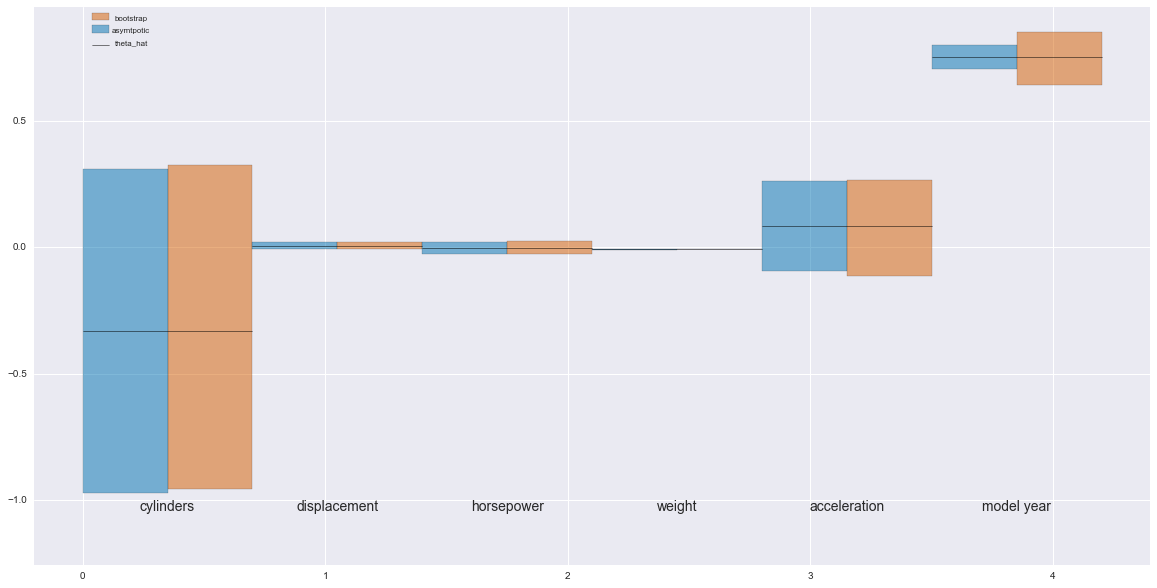

In [79]:
import matplotlib.patches as patches


fig8 = plt.figure(figsize=(20, 10))
ax = plt.gca()
def label(x, y, text, s):
    plt.text(x, y, text, ha="center", family='sans-serif', size=s)

w= 0.35 #largeur des rectangles
h_as =[]
h_bb =[]
for i in range(6):
    h_asymptot = IC_as[i,1]-IC_as[i,0]
    h_as.append( h_asymptot)
    h_bootstrap = IC_BB_all[i,1]-IC_BB_all[i,0]
    h_bb.append(h_bootstrap)

y_min = min(IC_BB_all[:,0])-0.3
y_max = max(IC_BB_all[:,1])+0.1

ax.set_ylim((y_min,y_max))
ax.set_xlim((-0.2,4.4))

#legend
ax.add_patch(patches.Rectangle((0.04, 0.85), width=0.07, height=0.03, facecolor=my_blue, alpha=0.5))
label(0.2,0.85, 'asymtpotic', 8)
ax.add_patch(patches.Rectangle((0.04, 0.90), width=0.07, height=0.03, facecolor=my_orange, alpha=0.5))
label(0.2,0.9, 'bootstrap',8)
ax.plot([0.04, 0.11], [0.8, 0.8], 'k-', lw=0.5)
label(0.2,0.8, 'theta_hat',8)

#cylinders
ax.add_patch(patches.Rectangle((0, IC_as[0, 0]),width=w, height=h_as[0],facecolor=my_blue, alpha=0.5))
ax.add_patch(patches.Rectangle((w, IC_BB_all[0,0]), width=w, height=h_bb[0], facecolor=my_orange, alpha=0.5))
ax.plot([0, 2*w], [theta1_hat[0], theta1_hat[0]], 'k-', lw=0.5)
label(w,-1.04, 'cylinders', 14)

#'displacement'
ax.add_patch(patches.Rectangle((2*w, IC_as[1,0]), width=w, height=h_as[1], facecolor=my_blue, alpha=0.5))
ax.add_patch(patches.Rectangle((3*w, IC_BB_all[1,0]), width=w, height=h_bb[1], facecolor=my_orange, alpha=0.5))
ax.plot([2*w, 4*w], [theta1_hat[1], theta1_hat[1]], 'k-', lw=0.5)
label(3*w,-1.04, 'displacement', 14)

#'horsepower'
ax.add_patch(patches.Rectangle((4*w, IC_as[2,0]), width=w, height=h_as[2], facecolor=my_blue, alpha=0.5))
ax.add_patch(patches.Rectangle((5*w, IC_BB_all[2,0]), width=w, height=h_bb[2], facecolor=my_orange, alpha=0.5))
ax.plot([4*w, 6*w], [theta1_hat[2], theta1_hat[2]], 'k-', lw=0.5)
label(5*w,-1.04, 'horsepower', 14)

#'weight'
ax.add_patch(patches.Rectangle((6*w, IC_as[3,0]), width=w, height=h_as[3], facecolor=my_blue, alpha=0.5))
ax.add_patch(patches.Rectangle((7*w, IC_BB_all[3,0]), width=w, height=h_bb[3], facecolor=my_orange, alpha=0.5))
ax.plot([6*w, 8*w], [theta1_hat[3], theta1_hat[3]], 'k-', lw=0.5)
label(7*w,-1.04, 'weight', 14)

# 'acceleration'
ax.add_patch(patches.Rectangle((8*w, IC_as[4,0]), width=w, height=h_as[4], facecolor=my_blue, alpha=0.5))
ax.add_patch(patches.Rectangle((9*w, IC_BB_all[4,0]), width=w, height=h_bb[4], facecolor=my_orange, alpha=0.5))
ax.plot([8*w, 10*w], [theta1_hat[4], theta1_hat[4]], 'k-', lw=0.5)
label(9*w,-1.04, 'acceleration', 14)

#'model year'
ax.add_patch(patches.Rectangle((10*w, IC_as[5,0]), width=w, height=h_as[5], facecolor=my_blue, alpha=0.5))
ax.add_patch(patches.Rectangle((11*w, IC_BB_all[5,0]), width=w, height=h_bb[5], facecolor=my_orange, alpha=0.5))
ax.plot([10*w, 12*w], [theta1_hat[5], theta1_hat[5]], 'k-', lw=0.5)
label(11*w,-1.04, 'model year', 14)

plt.show()

On voit dans ce cas précis que la méthode asymptotique donne des intervalles de confiance plus étroits que la méthode $bootstrap$